In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature (values between 0 and 10)
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Linear relation: y = 3*x + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Regressor with k=5 neighbors
knn_reg = KNeighborsRegressor(n_neighbors=9)
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 2.8454135184394493


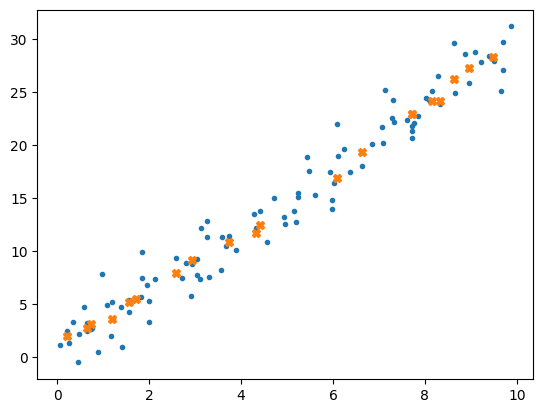

In [3]:
plt.plot(X,y, '.')
plt.plot(X_test,y_pred, 'X')

In [4]:
r2_score(y_test,y_pred)

0.965868224766871

In [5]:
from sklearn.model_selection import GridSearchCV
param= {'n_neighbors':np.arange(1,15)}

gsv= GridSearchCV(KNeighborsRegressor(),param, cv=5,scoring='r2')
gsv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='r2')

In [6]:
bestk = gsv.best_params_
bestk

{'n_neighbors': 9}

In [7]:
gsv.best_score_

0.9354467821836183

In [8]:
gsvpred=gsv.predict(X_test)
r2_score(y_test, gsvpred)

0.965868224766871